In [3]:
pip install matplotlib 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 32.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ratings_csv_path = "ml-latest-small/ratings.csv"

In [7]:
movies_csv_path = "ml-latest-small/movies.csv"

In [10]:
movies_df = pd.read_csv(movies_csv_path, index_col="movieId")
ratings_df = pd.read_csv(ratings_csv_path, index_col="userId")

In [11]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings_df.head()

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931


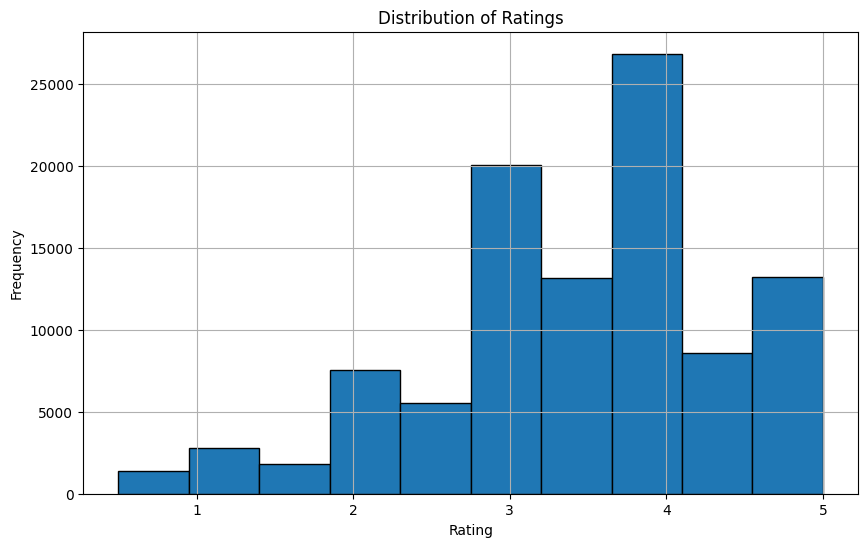

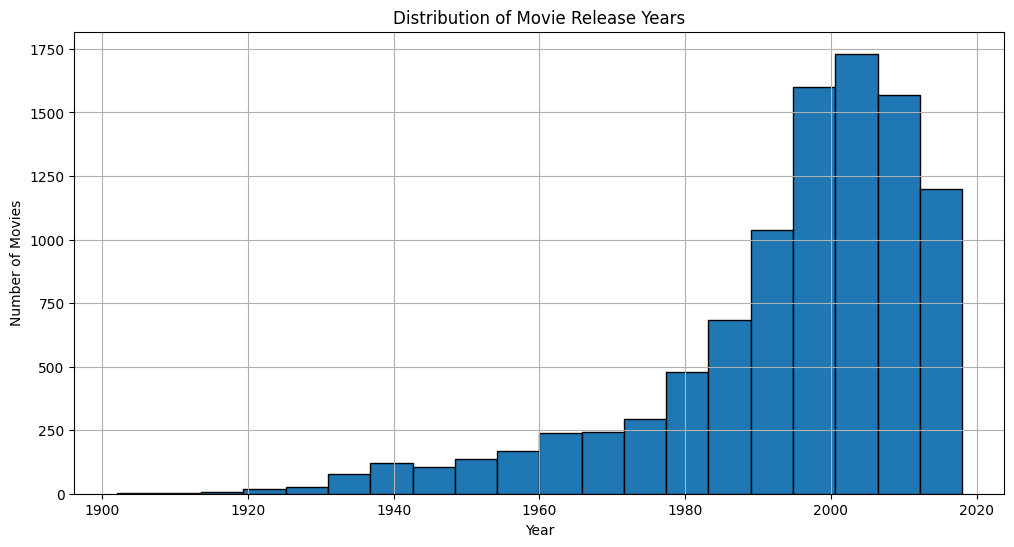

In [13]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
ratings_df['rating'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Extract year from movie titles (assuming year is in parentheses at the end of the title)
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)').astype(float)
plt.figure(figsize=(12, 6))
movies_df['year'].dropna().hist(bins=20, edgecolor='black')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


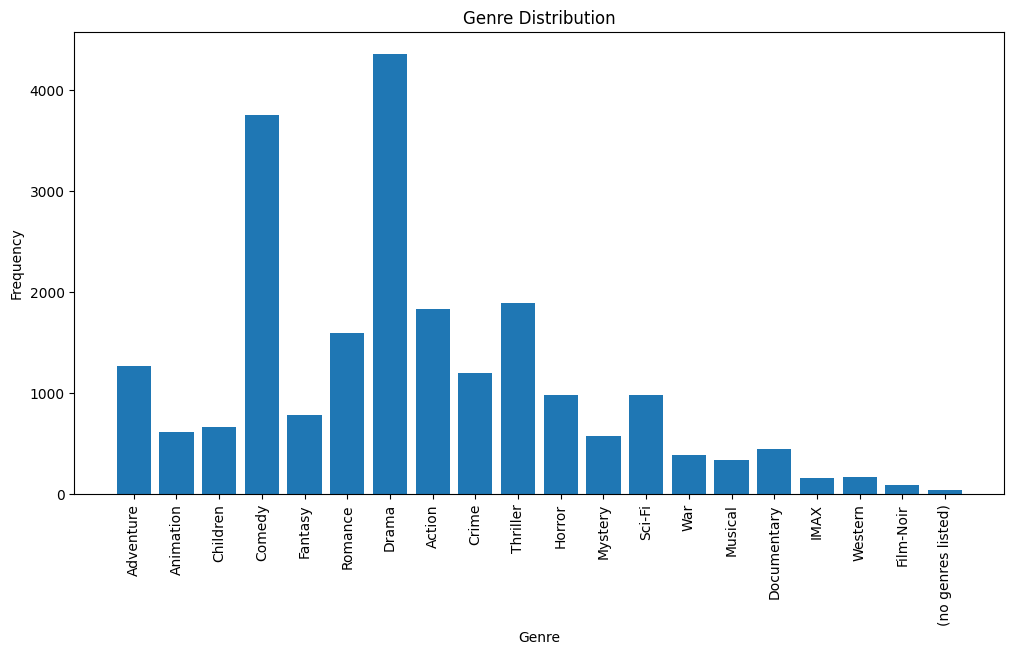

In [14]:
# Split genres and calculate frequency
from collections import Counter

# Split genres and create a list of all genres
all_genres = movies_df['genres'].str.split('|').sum()
genre_counts = Counter(all_genres)

# Plot genre frequencies
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [18]:
# Number of ratings per user
user_rating_counts = ratings_df['userId'].value_counts()

# Plot user activity distribution
plt.figure(figsize=(12, 6))
user_rating_counts.hist(bins=50, edgecolor='black')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

# Convert timestamp to datetime and analyze over time
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['rating_year'] = ratings_df['timestamp'].dt.year

plt.figure(figsize=(12, 6))
ratings_df['rating_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()


KeyError: 'userId'

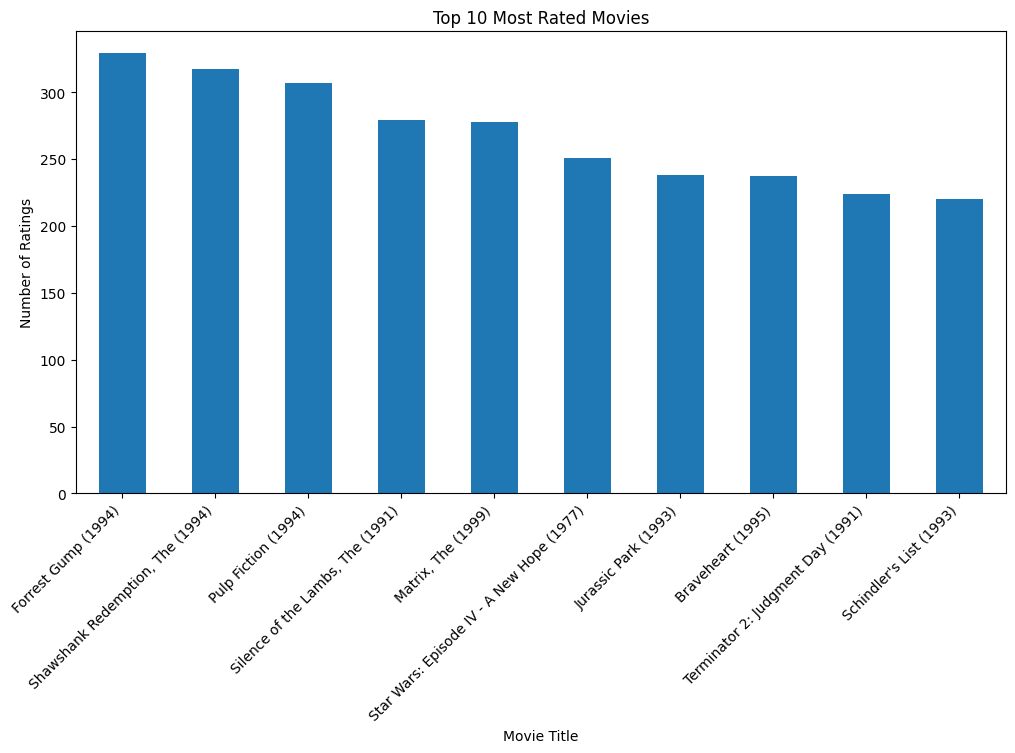

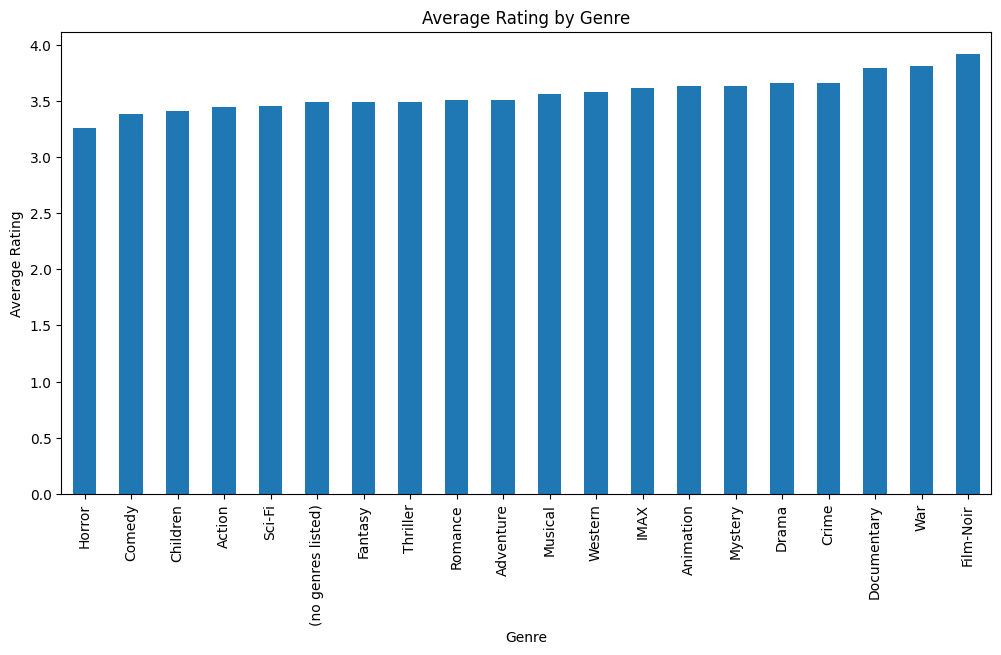

In [23]:
# Merge movies and ratings on movieId
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

# Calculate average rating per movie
average_ratings = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False)

# Find most-rated movies
most_rated_movies = merged_df['title'].value_counts().head(10)

# Plot the top 10 most-rated movies
plt.figure(figsize=(12, 6))
most_rated_movies.plot(kind='bar')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate average rating per genre
merged_df['genre'] = merged_df['genres'].str.split('|')
genre_ratings = merged_df.explode('genre').groupby('genre')['rating'].mean().sort_values()

# Plot average rating by genre
plt.figure(figsize=(12, 6))
genre_ratings.plot(kind='bar')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


In [24]:
# Correlation between rating frequency and average rating
movie_rating_counts = merged_df.groupby('title')['rating'].count()
average_rating_by_movie = merged_df.groupby('title')['rating'].mean()
correlation = movie_rating_counts.corr(average_rating_by_movie)
print("Correlation between number of ratings and average rating:", correlation)

# Top 10 users by number of ratings
top_users = ratings_df['userId'].value_counts().head(10)
print("Top 10 users by number of ratings:\n", top_users)

# Top 10 most-rated movies
top_movies = merged_df['title'].value_counts().head(10)
print("Top 10 most-rated movies:\n", top_movies)


Correlation between number of ratings and average rating: 0.12730726667013134


KeyError: 'userId'

In [24]:
# Correlation between rating frequency and average rating
movie_rating_counts = merged_df.groupby('title')['rating'].count()
average_rating_by_movie = merged_df.groupby('title')['rating'].mean()
correlation = movie_rating_counts.corr(average_rating_by_movie)
print("Correlation between number of ratings and average rating:", correlation)

# Top 10 users by number of ratings
top_users = ratings_df['userId'].value_counts().head(10)
print("Top 10 users by number of ratings:\n", top_users)

# Top 10 most-rated movies
top_movies = merged_df['title'].value_counts().head(10)
print("Top 10 most-rated movies:\n", top_movies)


Correlation between number of ratings and average rating: 0.12730726667013134


KeyError: 'userId'

Index([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       ...
       610, 610, 610, 610, 610, 610, 610, 610, 610, 610],
      dtype='int64', name='userId', length=100836)